# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/15/22
* Student Name: Julia Burek
* Student Net ID: jeb5pb
* This URL: <https://github.com/JuliaBurek/DS5100Project/blob/main/FinalProjectSubmissionTemplate.ipynb>
* GitHub Repo URL: <https://github.com/JuliaBurek/DS5100Project>

# The Monte Carlo Module

In [1]:
import pandas as pd
import numpy as np
import random

class Die:
    '''
    A die has a number of “faces” and weights, and can be rolled to select a face.
    The Die class takes an array of faces and initializes the weights to 1.0 for each face
    which can be changed. The die has one behavior, which is to be rolled one or more times.
    '''
    
    def __init__(self, faces):
        '''
       The init method initializes the die with an array of faces as an argument. 
       It initializes the weights to 1.0 for each face and saves both faces and weights 
       to a dataframe that is used for other methods in the class.
    
        PURPOSE: Given an array of faces, initializes the weights to 1.0 for each face. 
        Saves faces and weights to a dataframe.
    
        INPUTS
        faces   array of strings or numbers      
        '''
        self.faces = faces
        self.df = pd.DataFrame(columns=faces)
        self.df.loc[0] = 1.0
        
    def weights(self, face, weight):
        '''
        The weights method changes the weight of a single face. It takes a face value 
        and weight value and changes the weight of the face if it is in the array of faces. 
    
        PURPOSE: Given a face and weight, changes the weight of a single face if the face 
        is in the array and the weight is a float or int. Returns False if face is not 
        in the array.
    
        INPUTS
        face     string or number
        weight   int or float 
        '''
        if face in self.faces:
            if type(weight) == float or type(weight) == int:
                self.df.at[0,face] = weight
        else:
            return False
        
    def roll(self, rolls=1):
        '''
        The roll method rolls the die one or more times. It returns a list of outcomes 
        after taking a random sample from the vector of faces according to their weights. 
        The number of rolls defaults to 1.
    
        PURPOSE: Given the number of rolls, takes random sample from the vector of faces 
        according to their weights, and returns a list of outcomes.
    
        INPUTS
        rolls    int (number of rolls, defaults to 1)
    
        OUTPUT
        list    list of random sample of vector of faces according to their weights
        '''
        weights = self.df.values.tolist()
        return list(random.choices(self.faces, weights[0], k=rolls))
    
    def show(self):
        '''
        The show method displays the die's current set of faces and weights in a dataframe.
    
        PURPOSE: Returns the dataframe created in the initializer with the current set 
        of faces and weights.

        OUTPUT
        df  dataframe with die's current set of faces and weights
        '''
        return self.df

        
        
class Game:
    '''
    A game consists of rolling one or more dice of the same kind one or more times. 
    The Game class takes a die object from the Die class and has a behavior to play 
    a game. The class also keeps the results of its most recent play.
    '''
    
    def __init__(self, die_obj):
        '''
        The init method initializes a die object from the Die class and an empty 
        dataframe to be used in the other methods.
    
        PURPOSE: Initializes a die object from the Die class so that a game can be 
        played using the die. Creates an empty dataframe that is used in other methods.
    
        INPUTS
        die_obj   list of already instantiated similar Die objects
        '''
        self.die_obj = die_obj
        self.gamedf = pd.DataFrame()
    
    def play(self, x):
        '''
        The play method takes a parameter of how many times the dice should be rolled 
        and saves the result of the play to a dataframe. 
    
        PURPOSE: Rolls dice using the roll method from the Die class and saves results
        to dataframe.
    
        INPUTS
        x    int (number of rolls)
        
        OUTPUT
        gamedf    dataframe of results of game
        '''
        for die in self.die_obj:
            new = pd.Series(die.roll(x))
            self.gamedf = pd.concat([self.gamedf, new], axis=1)
        self.gamedf.index = ['Roll ' + str(i) for i in range(1, x+1)]
        self.gamedf.columns = ['Die ' + str(i) for i in range(1, len(self.die_obj) + 1)]
        return self.gamedf 
                             
    def show(self, form = 'wide'):
        '''
        The show method passes the dataframe to the user. It takes a parameter to 
        return the dataframe in narrow or wide form, the default form.
    
        PURPOSE: Returns a dataframe of results of game in either wide or narrow form.
    
        INPUTS
        form    str ('wide' or 'narrow')
    
        OUTPUT
        gamedf   dataframe of results either in wide or narrow form
        '''
        if form == 'wide':
            return self.gamedf
        if form == 'narrow':
            return self.gamedf.stack()
        else:
            return 'Not valid form option.'
        
       
    
class Analyzer:
    '''
    An analyzer takes the results of a single game and computes various descriptive 
    statistical properties about it, including face counts per roll, a jackpot count, and a combo count. 
    The analyzer class takes a game object from the Game class to perform the methods on.
    '''
    
    def __init__(self, game_obj):
        '''
        The init method takes a game object from the Game class as its input parameter and 
        infers the data type of the die faces used.
    
        PURPOSE: Initializes a game object from the Game class to use for other methods.
    
        INPUTS
        game_obj   game object (from the Game class)
        '''
        self.game_obj = game_obj
        self.face_dtype = type(self.game_obj.die_obj[0].faces[0])
    
    def jackpot(self):
        '''
        The jackpot method computes how many times the game resulted in all faces being identical. 
        It returns an integer for the number of jackpots and stores the results in a dataframe.
    
        PURPOSE: Returns integer for number of times the game results in all faces being identical 
        and stores results in dataframe.
    
        OUTPUT
        count   int (number of times the game resulted in all faces being identical)
        '''
        self.jackpotdf = pd.DataFrame(index=self.game_obj.gamedf.index, columns=['Jackpot'])
        lst = []
        for index,rows in self.game_obj.gamedf.iterrows():
            lst.append(set(rows))
        for i in range(len(lst)):
            if len(lst[i]) == 1:
                self.jackpotdf.iat[i,0] = True
            else:
                self.jackpotdf.iat[i,0] = False
        count = self.jackpotdf[self.jackpotdf['Jackpot'] == True].count()
        return count[0]
                
    def combo(self):
        '''
        The combo method computes the distinct combinations of faces rolled, along with their counts. 
        Combinations are sorted and and saved as a multi-columned index.
    
        PURPOSE: Returns dataframe of sorted combinations of faces rolled with their counts.
    
        OUTPUT
        data   dataframe (roll number as named index and Count column for number of combinations)
        '''
        df = self.game_obj.gamedf
        cols = list(df.columns)
        data = pd.DataFrame((df.groupby(cols).size()))
        data.columns = ['Count']
        return data
    
    def faceCountsPerRoll(self):
        '''
        The faceCountsPerRoll method computes how many times a given face is rolled in each event. 
        It stores the results as a dataframe that has an index of the roll number and face values 
        as columns.
    
        PURPOSE: Returns dataframe of how many times a given face is rolled in each event.
    
        OUTPUT
        facecount  dataframe (index of the roll number and face values as columns)
        '''
        self.facecount = pd.DataFrame(columns = self.game_obj.die_obj[0].faces)
        for i in self.game_obj.gamedf.index:
            self.facecount = self.facecount.append(self.game_obj.gamedf.T[i].value_counts())
            self.facecount = self.facecount.fillna(0)
            self.facecount = self.facecount.astype(int)
        return self.facecount

# Test Module

In [2]:
import unittest
import pandas as pd
from montecarlo import Die, Game, Analyzer

class MonteCarloTestSuite(unittest.TestCase):
    # Die Class Tests
    def test_1_init(self):
        faces = [1,2,3,4,5,6]
        try:
            die = Die(faces)
        except:
            print("Initialization failed")
    
    def test_2_weights(self):
        faces = [1,2,3,4,5,6]
        die = Die(faces)
        die.weights(1, 5)
        test = die.df.iat[0,0]
        actual = 5
        self.assertEqual(actual, test)    
    
    def test_3_roll(self):
        faces = [1,2,3,4,5,6]
        die = Die(faces)
        die.weights(3, 5000)
        test = die.roll(6)
        actual = [3,3,3,3,3,3]
        self.assertEqual(actual, test)
    
    def test_4_show(self):
        faces = [1,2,3,4,5,6]
        die = Die(faces)
        test = die.show().shape
        actual = (1,6)
        self.assertEqual(actual, test)
    
    
    # Game Class Tests
    def test_5_init(self):
        faces = [1,2,3,4,5,6]
        die = Die(faces)
        try:
            game = Game([die,die,die])
        except:
            print("Initialization failed")
       
    def test_6_play(self):
        faces = [1,2,3,4,5,6]
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        test = game.show().shape
        actual = (5,2)
        self.assertEqual(actual, test)
    
    def test_7_show(self):
        faces = [1,2,3,4,5,6]
        die = Die(faces)
        game = Game([die, die])
        game.play(5)
        test = game.show(form='narrow').shape
        actual = (10,)
        self.assertEqual(actual, test)
    
    
    # Analyzer Class Tests
    def test_8_init(self):
        faces = [1,2,3,4,5,6]
        die = Die(faces)
        game = Game([die, die])
        try:
            analyzer = Analyzer(game)
        except:
            print("Initialization failed")
        
    def test_9_jackpot(self):
        faces = [1,2]
        die = Die(faces)
        die.weights(1, 100000)
        game = Game([die, die])
        game.play(2)
        analyzer = Analyzer(game)
        test = analyzer.jackpot()
        actual = 2
        self.assertEqual(actual, test)
    
    def test_10_combo(self):
        faces = [1,2,3]
        die = Die(faces)
        game = Game([die, die])
        game.play(1000)
        analyzer = Analyzer(game)
        combos = analyzer.combo()
        test = combos.shape
        actual = (9,1)
        self.assertEqual(actual, test)
    
    def test_11_faceCountsPerRoll(self):
        faces = [1,2,3]
        die = Die(faces)
        game = Game([die, die, die])
        game.play(5)
        analyzer = Analyzer(game)
        facecount = analyzer.faceCountsPerRoll()
        test = facecount.shape
        actual = (5, 3)
        self.assertEqual(actual, test)

# Test Results

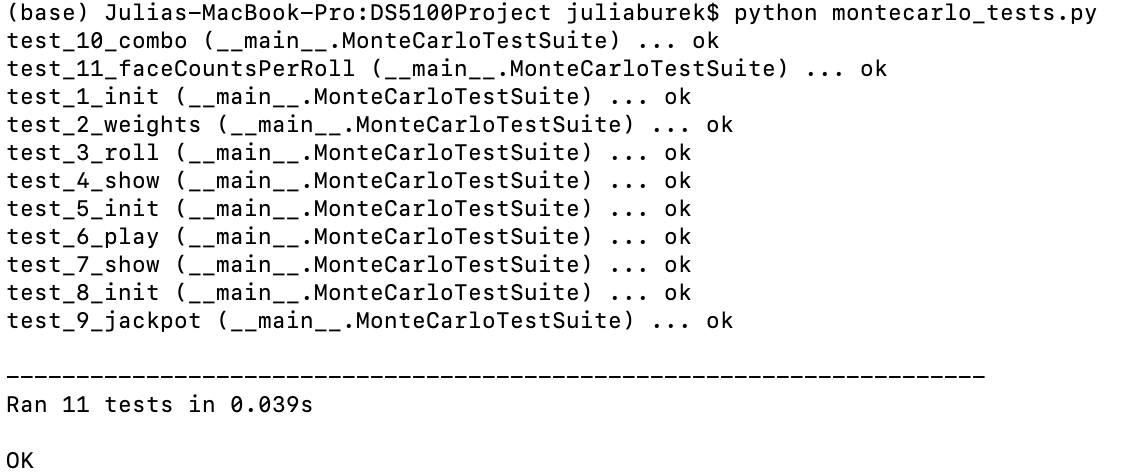

In [3]:
from IPython import display
display.Image("test_img.png")

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

In [4]:
from montecarlo import Die, Game, Analyzer
import matplotlib.pyplot as plt
import pandas as pd

1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [5]:
coin = ['H', 'T']
fair_coin = Die(coin)
print(fair_coin.show())
unfair_coin = Die(coin)
unfair_coin.weights('H', 5.0)
print(unfair_coin.show())

     H    T
0  1.0  1.0
     H    T
0  5.0  1.0


2. Play a game of 1000 flips of three coins with all fair dice.

In [6]:
fair_coin_game = [fair_coin, fair_coin, fair_coin]
game1 = Game(fair_coin_game)
game1.play(1000)
game1.show()

,Die 1,Die 2,Die 3
Roll 1,T,H,H
Roll 2,H,H,H
Roll 3,H,T,H
Roll 4,H,T,H
Roll 5,H,H,H
...,...,...,...
Roll 996,H,T,T
Roll 997,H,T,H
Roll 998,T,H,H
Roll 999,T,H,H


3. Play a game of 1000 flips with two unfair dice and one fair die.

In [7]:
unfair_coin_game = [fair_coin, unfair_coin, unfair_coin]
game2 = Game(unfair_coin_game)
game2.play(1000)
game2.show()

,Die 1,Die 2,Die 3
Roll 1,H,H,H
Roll 2,H,H,T
Roll 3,H,H,H
Roll 4,T,H,H
Roll 5,H,H,H
...,...,...,...
Roll 996,T,H,H
Roll 997,T,H,H
Roll 998,T,H,H
Roll 999,H,H,H


4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.

In [8]:
analyzergame1 = Analyzer(game1)
analyzergame2 = Analyzer(game2)
game1jackpot = analyzergame1.jackpot()
game2jackpot = analyzergame2.jackpot()
print('Fair Coin Game Jackpot Count: ', game1jackpot)
print('Unfair Coin Game Jackpot Count: ', game2jackpot)

Fair Coin Game Jackpot Count:  256
Unfair Coin Game Jackpot Count:  373


5. Compute relative frequency as the number of jackpots over the total number of rolls.

In [9]:
frequency = [game1jackpot/1000, game2jackpot/1000]
print('Fair Coin Game Jackpot Relative Frequency: ', frequency[0])
print('Unfair Coin Game Jackpot Relative Frequency: ', frequency[1])

Fair Coin Game Jackpot Relative Frequency:  0.256
Unfair Coin Game Jackpot Relative Frequency:  0.373


6. Show your results, comparing the two relative frequencies, in a simple bar chart.

Text(0.5, 1.0, 'Jackpot Frequency')

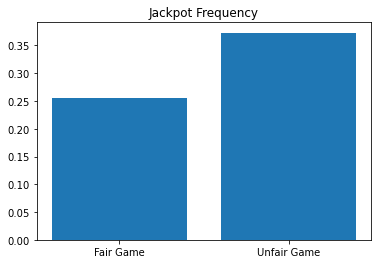

In [10]:
labs = ['Fair Game', 'Unfair Game']
plt.bar(labs, frequency)
plt.title('Jackpot Frequency')

## Scenario 2

1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [11]:
die = [1,2,3,4,5,6]
fair_die = Die(die)
print(fair_die.show())

unfair_die1 = Die(die)
unfair_die1.weights(6, 5.0)
print(unfair_die1.show())

unfair_die2 = Die(die)
unfair_die2.weights(1, 5.0)
print(unfair_die2.show())

     1    2    3    4    5    6
0  1.0  1.0  1.0  1.0  1.0  1.0
     1    2    3    4    5    6
0  1.0  1.0  1.0  1.0  1.0  5.0
     1    2    3    4    5    6
0  5.0  1.0  1.0  1.0  1.0  1.0


2. Play a game of 10000 rolls with 5 fair dice.

In [12]:
fair_die_game = [fair_die, fair_die, fair_die, fair_die, fair_die]
game1 = Game(fair_die_game)
game1.play(10000)
game1.show()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll 1,1,6,4,3,6
Roll 2,6,1,1,3,6
Roll 3,1,2,4,2,6
Roll 4,6,5,4,4,1
Roll 5,4,4,4,6,5
...,...,...,...,...,...
Roll 9996,3,1,6,3,6
Roll 9997,4,3,5,4,6
Roll 9998,5,3,4,3,6
Roll 9999,5,1,1,5,1


3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [13]:
unfair_die_game = [unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die]
game2 = Game(unfair_die_game)
game2.play(10000)
game2.show()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll 1,6,3,6,2,2
Roll 2,6,6,2,1,4
Roll 3,6,4,1,2,2
Roll 4,6,6,4,6,5
Roll 5,1,4,3,5,1
...,...,...,...,...,...
Roll 9996,1,4,1,3,4
Roll 9997,2,6,5,4,2
Roll 9998,4,6,3,4,5
Roll 9999,3,6,6,5,1


4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

Fair Die Game Jackpot Count:  10
Unfair Die Game Jackpot Count:  12
Fair Coin Game Jackpot Relative Frequency:  0.001
Unfair Coin Game Jackpot Relative Frequency:  0.0012


Text(0.5, 1.0, 'Jackpot Frequency')

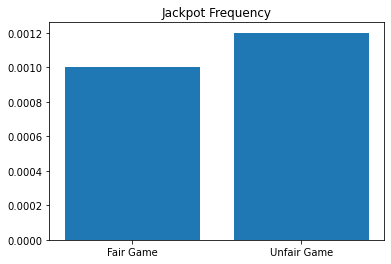

In [14]:
analyzergame1 = Analyzer(game1)
analyzergame2 = Analyzer(game2)
game1jackpot = analyzergame1.jackpot()
game2jackpot = analyzergame2.jackpot()
print('Fair Die Game Jackpot Count: ', game1jackpot)
print('Unfair Die Game Jackpot Count: ', game2jackpot)

frequency = [game1jackpot/10000, game2jackpot/10000]
print('Fair Coin Game Jackpot Relative Frequency: ', frequency[0])
print('Unfair Coin Game Jackpot Relative Frequency: ', frequency[1])

labs = ['Fair Game', 'Unfair Game']
plt.bar(labs, frequency)
plt.title('Jackpot Frequency')

5. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

Text(0.5, 1.0, '10 Most Frequent Combinations of Faces for Fair Game')

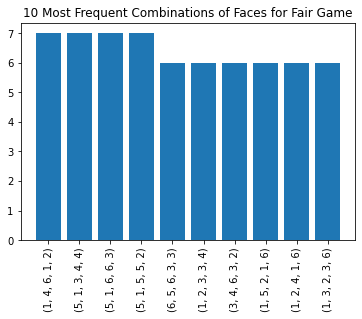

In [15]:
fairgamecombo = analyzergame1.combo()
fairgame10 = pd.DataFrame(fairgamecombo.groupby(fairgamecombo.index)['Count'].sum().sort_values(ascending=False).head(10))
fairlst = [fairgame10['Count'][i] for i in range(10)]
fairlst2 = ([str(fairgame10.index[i]) for i in range(10)])
plt.bar(fairlst2, fairlst)
plt.xticks(rotation='vertical')
plt.title('10 Most Frequent Combinations of Faces for Fair Game')

Text(0.5, 1.0, '10 Most Frequent Combinations of Faces for Unfair Game')

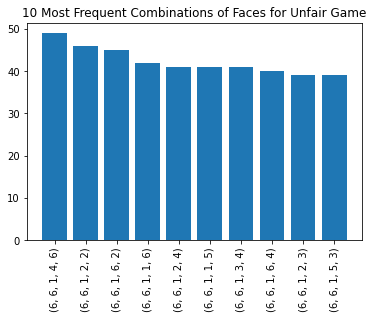

In [16]:
unfairgamecombo = analyzergame2.combo()
unfairgame10 = pd.DataFrame(unfairgamecombo.groupby(unfairgamecombo.index)['Count'].sum().sort_values(ascending=False).head(10))
unfairlst = [unfairgame10['Count'][i] for i in range(10)]
unfairlst2 = ([str(unfairgame10.index[i]) for i in range(10)])
plt.bar(unfairlst2, unfairlst)
plt.xticks(rotation='vertical')
plt.title('10 Most Frequent Combinations of Faces for Unfair Game')

## Scenario 3

1. Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [17]:
letterdie = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
letterdieobj = Die(letterdie)
letterdieobj.weights('a', 8.4966)
letterdieobj.weights('b', 2.0720)
letterdieobj.weights('c', 4.5388)
letterdieobj.weights('d', 3.3844)
letterdieobj.weights('e', 11.1607)
letterdieobj.weights('f', 1.8121)
letterdieobj.weights('g', 2.4705)
letterdieobj.weights('h', 3.0034)
letterdieobj.weights('i', 7.5448)
letterdieobj.weights('j', 0.1965)
letterdieobj.weights('k', 1.1016)
letterdieobj.weights('l', 5.4893)
letterdieobj.weights('m', 3.0129)
letterdieobj.weights('n', 6.6544)
letterdieobj.weights('o', 7.1635)
letterdieobj.weights('p', 3.1671)
letterdieobj.weights('q', 0.1962)
letterdieobj.weights('r', 7.5809)
letterdieobj.weights('s', 5.7351)
letterdieobj.weights('t', 6.9509)
letterdieobj.weights('u', 3.6308)
letterdieobj.weights('v', 1.0074)
letterdieobj.weights('w', 1.2899)
letterdieobj.weights('x', 0.2902)
letterdieobj.weights('y', 1.7779)
letterdieobj.weights('z', 0.2722)

2. Play a game involving 5 of these dice with 1000 rolls.

In [18]:
gameletter5 = [letterdieobj,letterdieobj,letterdieobj,letterdieobj,letterdieobj]
gameletter = Game(gameletter5)
gameletter.play(1000)
gameletter.show()

,Die 1,Die 2,Die 3,Die 4,Die 5
Roll 1,e,e,v,r,a
Roll 2,i,r,i,v,a
Roll 3,y,s,t,r,a
Roll 4,o,r,o,l,k
Roll 5,h,d,n,v,e
...,...,...,...,...,...
Roll 996,e,a,t,a,e
Roll 997,g,h,h,i,n
Roll 998,t,e,n,i,h
Roll 999,m,r,a,r,b


3. How many combos can you that look like actual English words?

I counted around 21 words that appeared to look like English words.

4. Based on your eye count, what is the relative frequency of these words versus the rest?

In [19]:
wordfreq = 21/1000
wordfreq

0.021

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [20]:
!ls -lRF -o

total 1472
-rw-r--r--@ 1 juliaburek  456980 Jul 15 16:20 FinalProjectSubmissionTemplate.ipynb
drwxr-xr-x@ 7 juliaburek     224 Jul 15 10:28 MonteCarloPackage.egg-info/
-rw-r--r--  1 juliaburek       0 Jul 15 10:19 __init__.py
drwxr-xr-x@ 3 juliaburek      96 Jul 15 10:40 __pycache__/
-rw-r--r--@ 1 juliaburek    8055 Jul 15 15:27 montecarlo.py
-rw-r--r--  1 juliaburek    2880 Jul 15 10:39 montecarlo_tests.py
-rw-r--r--  1 juliaburek     671 Jul 15 16:09 montecarlo_tests.txt
-rw-r--r--  1 juliaburek     369 Jul 15 10:18 setup.py
-rw-r--r--  1 juliaburek  272887 Jul 15 10:43 test_img.png

./MonteCarloPackage.egg-info:
total 40
-rw-r--r--  1 juliaburek  254 Jul 15 16:21 PKG-INFO
-rw-r--r--  1 juliaburek  212 Jul 15 16:21 SOURCES.txt
-rw-r--r--  1 juliaburek    1 Jul 15 16:21 dependency_links.txt
-rw-r--r--  1 juliaburek   32 Jul 15 16:21 requires.txt
-rw-r--r--  1 juliaburek    1 Jul 15 16:21 top_level.txt

./__pycache__:
total 24
-rw-r--r--  1 juliaburek  8829 Jul 15 16:05 montecarlo.cpyt

# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [21]:
!pip install -e .

Obtaining file:///Users/juliaburek/Desktop/MSDS/DS5100/DS5100Project
  Attempting uninstall: MonteCarloPackage
    Found existing installation: MonteCarloPackage 1.0.0
    Uninstalling MonteCarloPackage-1.0.0:
      Successfully uninstalled MonteCarloPackage-1.0.0
  Running setup.py develop for MonteCarloPackage
